# Kickstarter campaigns
## Money raised by launch, blurb, name, state and goal

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
kickstarter_data_full = pd.read_csv('kickstarter_data_full.csv')

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
kickstarter_data_full.head()

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [4]:
kickstarter_data_full.columns

Index(['Unnamed: 0', 'id', 'photo', 'name', 'blurb', 'goal', 'pledged',
       'state', 'slug', 'disable_communication', 'country', 'currency',
       'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged', 'creator',
       'location', 'category', 'profile', 'spotlight', 'urls', 'source_url',
       'friends', 'is_starred', 'is_backing', 'permissions', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
   

In [5]:
kickstarter_data_full[['id', 'state']].groupby(['state']).count()

,id
state,
canceled,2460
failed,11416
live,508
successful,6018
suspended,230


In [6]:
total_kick = len(kickstarter_data_full)
print("Total kickstarter campaigns: ", total_kick)

Total kickstarter campaigns:  20632


In [7]:
print("Number of failed kickstarters: ", len(kickstarter_data_full[kickstarter_data_full.state == 'failed']))
print("Number of successful kickstarters: ", len(kickstarter_data_full[kickstarter_data_full.state == 'successful']))

Number of failed kickstarters:  11416
Number of successful kickstarters:  6018


### Median money pledged for Kickstarter campaigns by day of the week, all campaigns

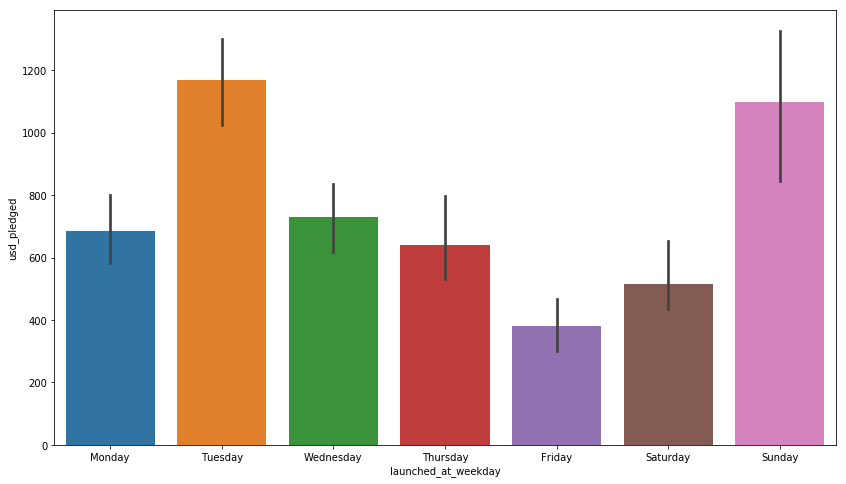

In [8]:
week_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(14,8))
a = sns.barplot(x='launched_at_weekday', y='usd_pledged', data=kickstarter_data_full, order=week_order, estimator=np.median)
plt.show()

### Median money pledged for Kickstarter campaigns by day of the week, removing all campaigns above $100k

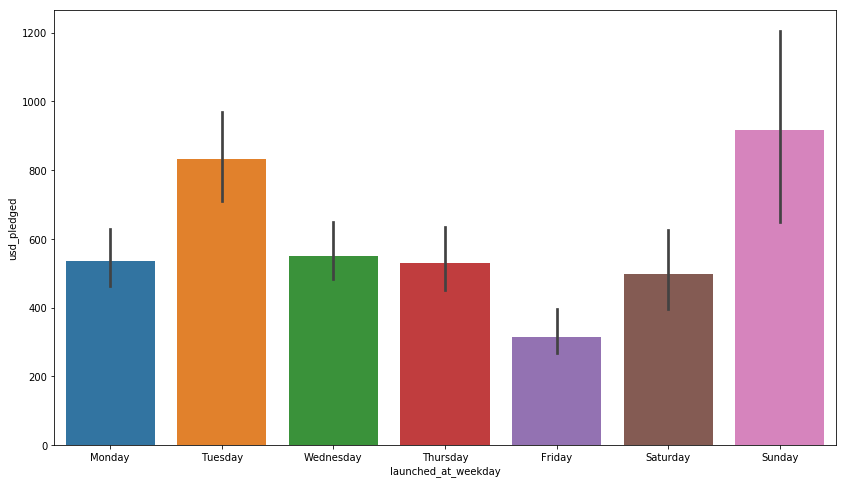

In [9]:
plt.figure(figsize=(14,8))
a = sns.barplot(x='launched_at_weekday', y='usd_pledged', data=kickstarter_data_full[kickstarter_data_full['usd_pledged'] < 100000], order=week_order, estimator=np.median)
plt.show()

Using the median value as the estimator for the barplot helps to remove the large outliers, but there still seems to be a lot of very large campaigns that were launched on Tuesday which moves the needle upwards. Sunday is also a strong day, but seems to be more prominent among slightly smaller campaigns. Tuesday seems to be the much more significant 

In [10]:
# is the data already significant between Tuesday and all other days
stats.ttest_ind(kickstarter_data_full[kickstarter_data_full.launched_at_weekday == 'Tuesday'].usd_pledged,
               kickstarter_data_full[kickstarter_data_full.launched_at_weekday != 'Tuesday'].usd_pledged)

Ttest_indResult(statistic=6.546308680377197, pvalue=6.036398161358499e-11)

In [11]:
# is the data already significant between Tuesday and Sunday
stats.ttest_ind(kickstarter_data_full[kickstarter_data_full.launched_at_weekday == 'Tuesday'].usd_pledged,
               kickstarter_data_full[kickstarter_data_full.launched_at_weekday == 'Sunday'].usd_pledged)

Ttest_indResult(statistic=2.8670226590010763, pvalue=0.004158721101063231)

### Money raised by blurb length

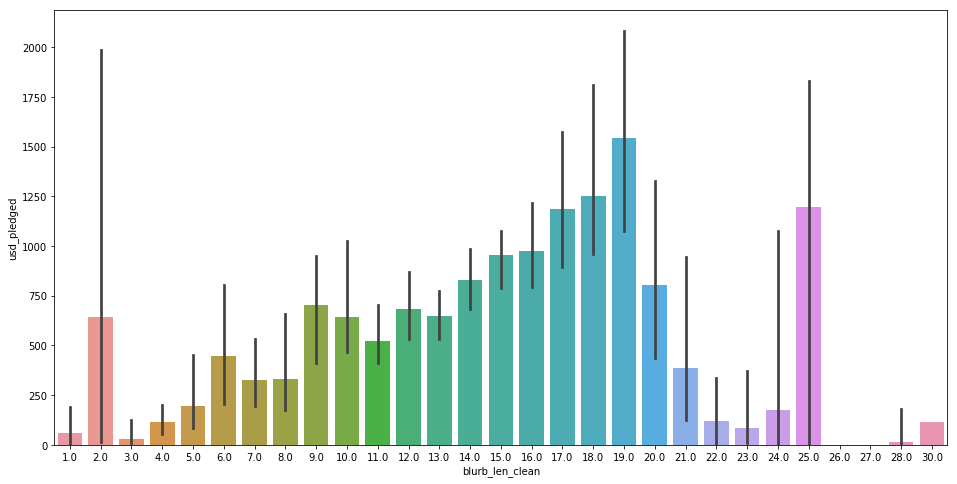

In [12]:
plt.figure(figsize=(16,8))
a = sns.barplot(x='blurb_len_clean', y='usd_pledged', data=kickstarter_data_full, estimator=np.median)
plt.show()

#### Boxplot distribution with money raised within 1 standard deviation of population

In [13]:
kickstarter_full_std3 = kickstarter_data_full[((kickstarter_data_full.usd_pledged - kickstarter_data_full.usd_pledged.mean()) / kickstarter_data_full.usd_pledged.std()).abs() < 3]
kickstarter_full_std2 = kickstarter_data_full[((kickstarter_data_full.usd_pledged - kickstarter_data_full.usd_pledged.mean()) / kickstarter_data_full.usd_pledged.std()).abs() < 2]
kickstarter_full_std1 = kickstarter_data_full[((kickstarter_data_full.usd_pledged - kickstarter_data_full.usd_pledged.mean()) / kickstarter_data_full.usd_pledged.std()).abs() < 1]

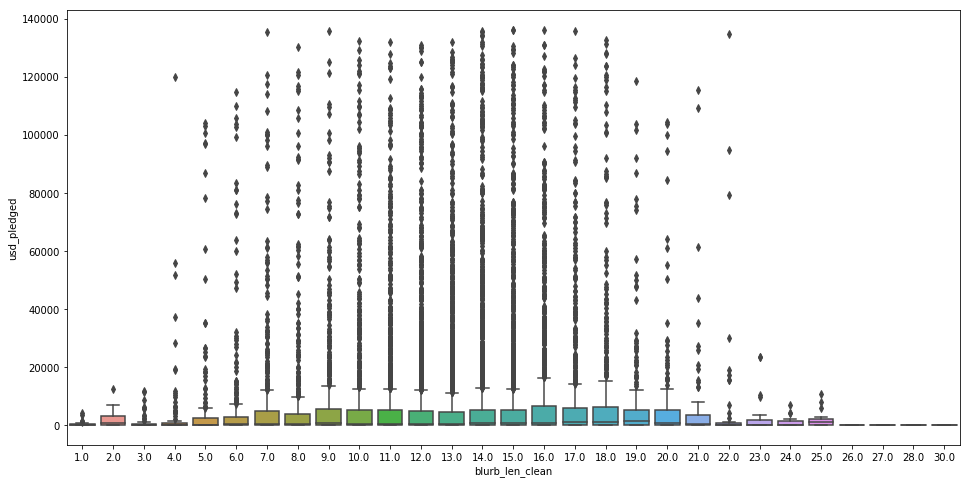

In [14]:
plt.figure(figsize=(16,8))
# a = sns.boxplot(x='blurb_len_clean', y='usd_pledged', data=kickstarter_full_std3)
# b = sns.boxplot(x='blurb_len_clean', y='usd_pledged', data=kickstarter_full_std2)
c = sns.boxplot(x='blurb_len_clean', y='usd_pledged', data=kickstarter_full_std1)
plt.show()

With such large error bars on the barplot, I thought looking at the data removing outliers would help. Unfortunately, there is so much variability in the data, that even looking within 1 standard deviation doesn't yield too much of a conclusion.

However, looking at the barplot, there is an increasing trend up to 19 words, then diminishing returns thereafter, and then a spike at 25. The variance is money raised for blurb length in words of 19 and 25 seem significant enough to test.

### Money raised by name length, mean and median below

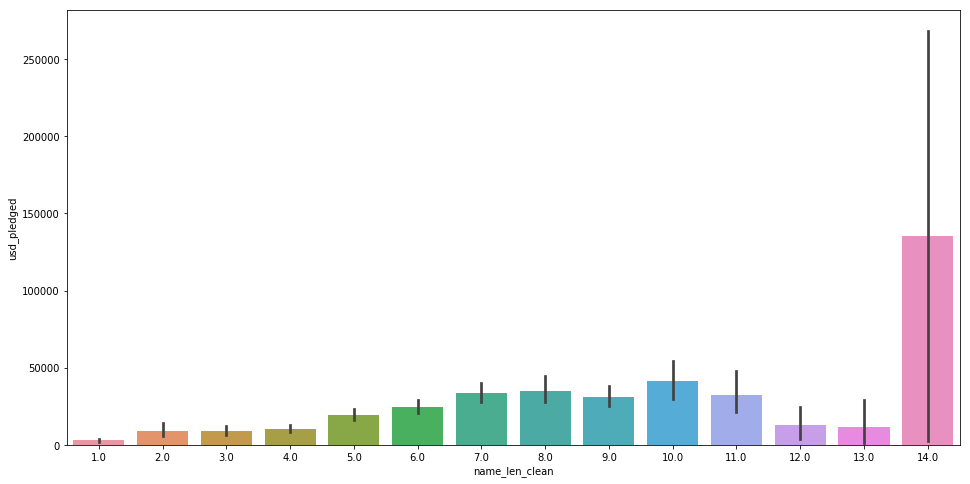

In [15]:
plt.figure(figsize=(16,8))
a = sns.barplot(x='name_len_clean', y='usd_pledged', data=kickstarter_data_full)
plt.show()

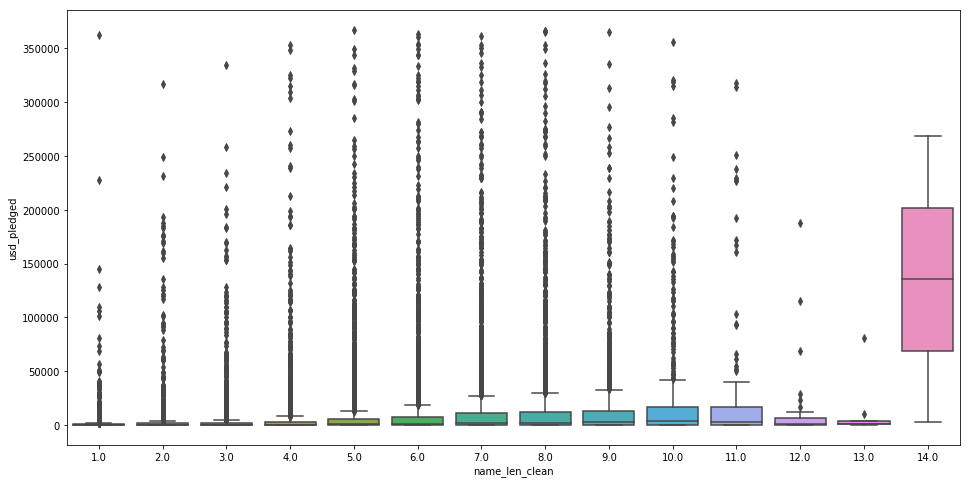

In [16]:
plt.figure(figsize=(16,8))
a = sns.boxplot(x='name_len_clean', y='usd_pledged', data=kickstarter_full_std3)
# b = sns.boxplot(x='name_len_clean', y='usd_pledged', data=kickstarter_full_std2)
# c = sns.boxplot(x='name_len_clean', y='usd_pledged', data=kickstarter_full_std1)
plt.show()

I don't think this is telling as it might seem. The name length seems to be cutoff at 14 characters in the data we get, so that '14.0' value is more a '14 and greater' which represents a lot more data points than we can see. For this reason, I don't think we have enough information to identify any trend among name length.

### Money pledged by state

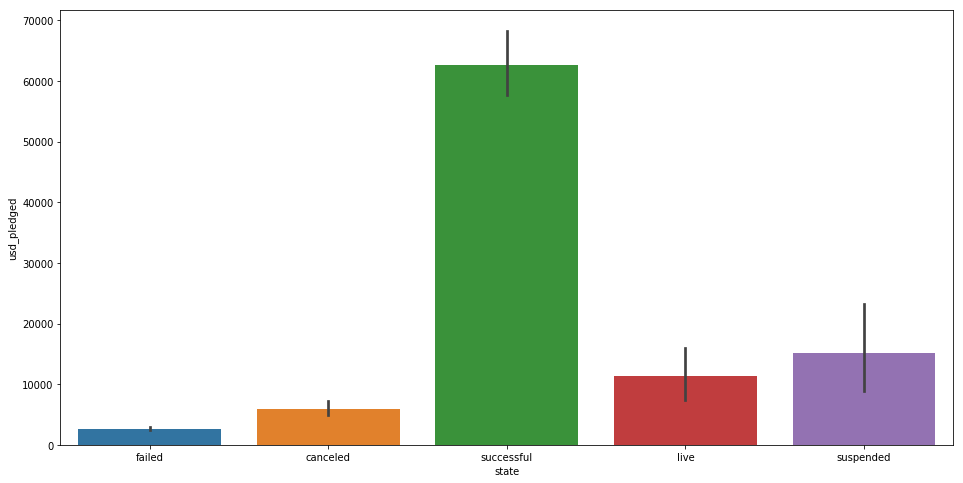

In [17]:
plt.figure(figsize=(16,8))
a = sns.barplot(x='state', y='usd_pledged', data=kickstarter_data_full)
plt.show()

Not too surprising to see this, it is interesting to see so much money left on the table in the cancelled and suspended states. Still not enough here to create an experiment.

### Distribution of money pledged

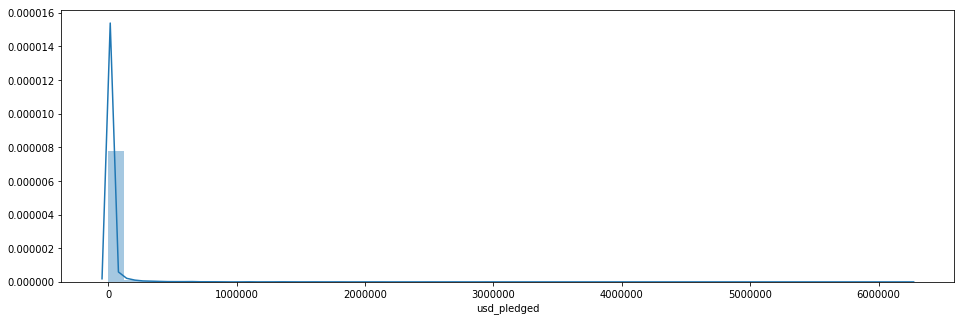

In [18]:
plt.figure(figsize=(16,5))
a = sns.distplot(kickstarter_data_full['usd_pledged'], bins=50)
plt.show()

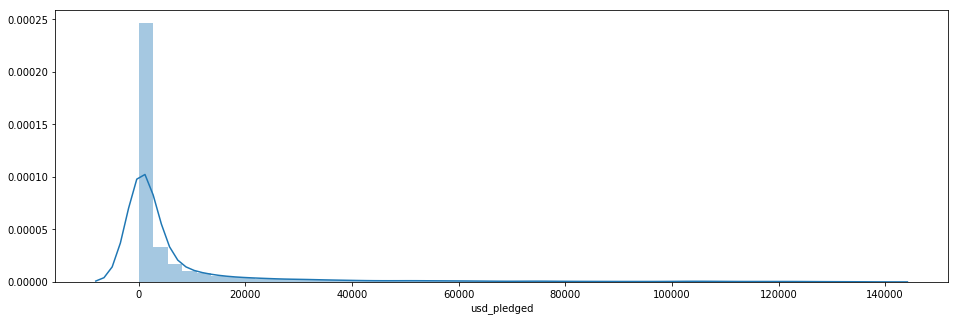

In [19]:
plt.figure(figsize=(16,5))
a = sns.distplot(kickstarter_full_std1['usd_pledged'], bins=50)
plt.show()

Obviously quite a few outliers that are skewing the data. Even when you pair down the data to only 1 standard deviation, there is still a lot of campaigns skewing the data.

### Scatterplot of money pledged by goal, including all 'states' (successful, failed, etc.)

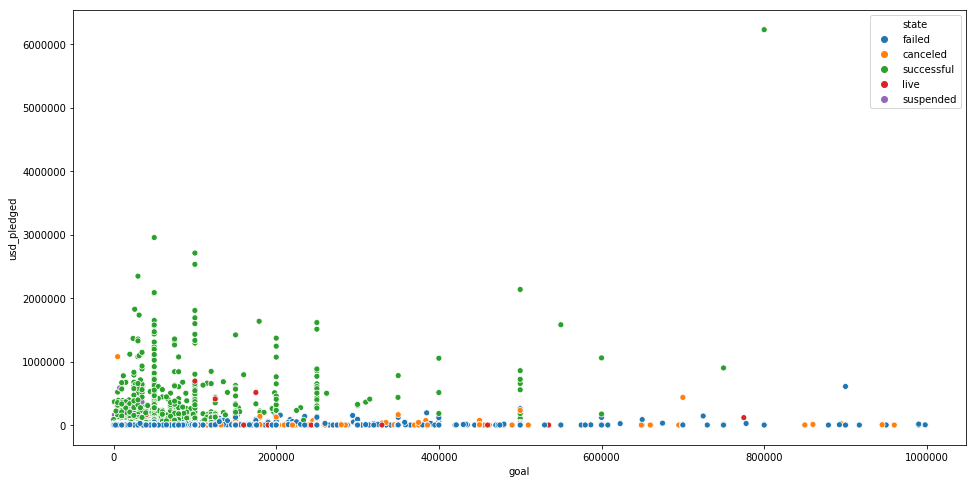

In [20]:
plt.figure(figsize=(16,8))
a = sns.scatterplot(x='goal', y='usd_pledged', data=kickstarter_data_full[kickstarter_data_full['goal'] < 1000000], hue='state')
plt.show()

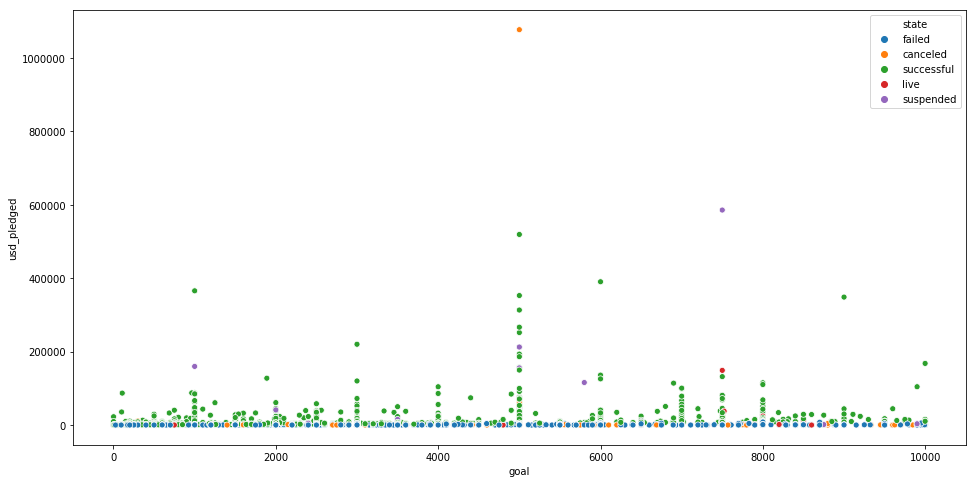

In [21]:
plt.figure(figsize=(16,8))
a = sns.scatterplot(x='goal', y='usd_pledged', data=kickstarter_data_full[kickstarter_data_full['goal'] < 10000], hue='state')
plt.show()

Not sure how to use this just yet. It identifies that there a lot of outliers and a lot of noise in the 'state' data. It's also rare for campaigns that ask for >500k to raise that much and tend to not be 'successful.'

### Money raised by 'staff pick' selection

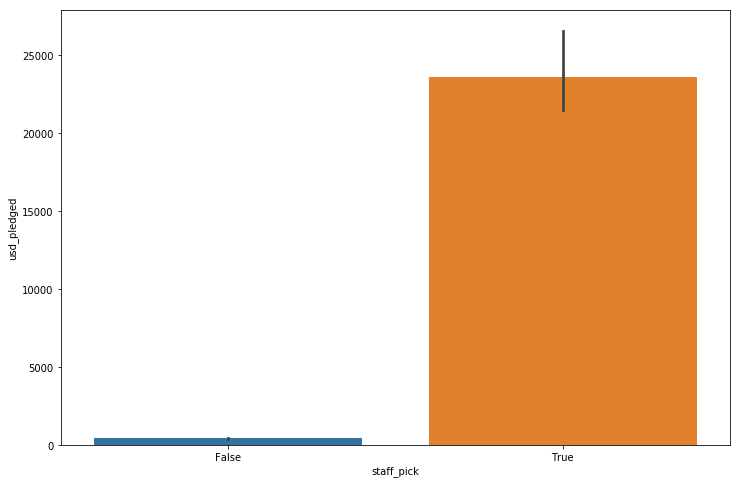

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x='staff_pick', y='usd_pledged', data=kickstarter_data_full, estimator=np.median)
plt.show()

In [23]:
# is the data already significant between true and false staff-pick
stats.ttest_ind(kickstarter_data_full[kickstarter_data_full.staff_pick == True].usd_pledged,
               kickstarter_data_full[kickstarter_data_full.staff_pick == False].usd_pledged)

Ttest_indResult(statistic=39.80386295859086, pvalue=0.0)

This was kind of expected. I imagine there are all sorts of perks that come with a staff pick, including prime placement on the website, a filtering function for staff pick on the website, etc. This components would make discovery of these campaigns much easier and probably add to the momentum of a campaign which push more and more people to contribute. However, just because my theory here is expected, doesn't limit the opportunity that Kickstarter could sell these staff picks given how much variance there is between the two groups.

## Experiment

There are three experiments that come to mind based on the above analysis. The metric to analyze to determine success will be usd dollars pledged. The variables to test below:
1. Test launch date 
2. Test blurb length
3. Test staff-pick selection

For the first experiment testing launch date, we really want to test if Tuesday is the most successful date to launch against all other weekdays. In order to test success of launch date, each campaign individual would randomly split their social media followers in half (Facebook, Instagram, Twitter, etc.), then share the campaign with one half of their followers on Tuesday and the other half on any other day (ideally Wednesday or Thursday). Ideally the 'Other' launch date would be Monday, Wednesday or Thursday as they are weekdays not weekend days to make it more consistent; Sunday might be more significant than other days and something to test later on. The more campaigns you could run would increase the sample size and determine how significant Tuesday is in raising money for a campaign. Campaigns that launch on Tuesday see a roughly 60% increase in median dollars raised. If the experiment we run sees a 50% increase by releasing on Tuesday versus the control group and is statistically significant with a p-value less than 5% than we should determine Tuesday is the best day to launch a Kickstarter campaign.


The second experiment will be to test blurb length, which isn't a description but rather more like a jingle or something to catch interest. I would do the same experiment as above, but control day of the week and launch all of the campaigns on Tuesday as those campaigns get the most funding generally, and instead test 2 blurb lengths: 19 and 25. These seem to be the most distinct in terms of money raised. I would like to see if 19 words for blurb length is the ideal number of words by more money raised. In our dataset, campaigns with 19 words in blurb length see a roughly 25% increase in money raised than campaigns with blurb lengths of 25 words. If the experiment we run sees at least a 20% increase by releasing a blurb of 19 words against the control group of 25 words and is statistically significant with a p-value less than 5% than we should determine 19 words is the ideal length for a blurb.


The third and final experiment is to test staff pick selection. This experiment would probably need to be done in conjunction with Kickstarter so as to control the message traffic to the site receives. For half of the traffic we would randomly assign whether they see the campaign as a 'staff pick', whereas the other half would not see the campaign as a staff pick or show up prevalently on the site. There is a massive difference between median money raised between staff picks and not. The p-value is 0. Any p-value less than 1% would confirm that being identified as a staff-pick increases the amount of money you raise. I think it's important to choose a much smaller p-value given the data we have almost makes it certain that a staff-pick will greatly improve the amount of money you raise.